## prueba Bloque

In [1]:
from zeddg import ZEDDG
import torch
import glob
import os
import random
from utils.multi_guide import latentes_explicitas

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
fruta = ZEDDG(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Expected types for feature_extractor: (<class 'transformers.models.clip.feature_extraction_clip.CLIPFeatureExtractor'>,), got <class 'transformers.models.clip.image_processing_clip.CLIPImageProcessor'>.


In [2]:
# Define la ruta a la carpeta que contiene tus imágenes
ruta_a_la_carpeta = "images/gatos/"

# 1. Define una lista con los patrones de las extensiones que buscas
patrones_a_buscar = ["*.jpg", "*.jpeg", "*.png"]

# 2. Crea una lista vacía para guardar todos los archivos encontrados
lista_de_imagenes = []

# 3. Itera sobre cada patrón, busca los archivos y agrégalos a la lista principal
for patron in patrones_a_buscar:
    # glob.glob devuelve una lista de archivos para el patrón actual
    # Usamos .extend() para añadir esos archivos a nuestra lista general
    lista_de_imagenes.extend(glob.glob(os.path.join(ruta_a_la_carpeta, patron)))

if lista_de_imagenes:
    print(f"Se encontraron {len(lista_de_imagenes)} imágenes:")
    print(lista_de_imagenes)

    # Elige una imagen al azar de la lista completa
    ruta_principal = lista_de_imagenes.pop(random.randint(0, len(lista_de_imagenes) - 1))
    print(f"\nImagen principal seleccionada: '{ruta_principal}'")
else:
    print(f"No se encontraron imágenes con las extensiones especificadas en la carpeta '{ruta_a_la_carpeta}'")


Se encontraron 4 imágenes:
['images/gatos/depositphotos_24545117-stock-photo-black-cat-sitting-and-looking.jpg', 'images/gatos/download (1).jpeg', 'images/gatos/download.jpeg', 'images/gatos/images.jpeg']

Imagen principal seleccionada: 'images/gatos/images.jpeg'


In [3]:
lista_de_tensores = [] # Lista vacía para guardar los resultados

print(f"\nProcesando imagen principal: {ruta_principal}")
x_ts, seecoder = fruta.latte(ruta_principal, principal=True)
lista_de_tensores.append(x_ts[-1].clone())

print("\nProcesando cada imagen...")

for ruta_imagen in lista_de_imagenes:
    print(f" -> Procesando: {ruta_imagen}")
    
    # Llama a tu función para obtener el tensor de [1, 4, 64, 64]
    x_t = fruta.latte(ruta_imagen)
    
    # Añade el tensor a nuestra lista
    lista_de_tensores.append(x_t)

print(f"\nSe han procesado y guardado {len(lista_de_tensores)} tensores en la lista.")
thriller = torch.cat(lista_de_tensores, dim=0)


Procesando imagen principal: images/gatos/images.jpeg
load
encode
seecoder_latents
ddim


inversion: 100%|██████████| 50/50 [00:04<00:00, 11.65it/s]



Procesando cada imagen...
 -> Procesando: images/gatos/depositphotos_24545117-stock-photo-black-cat-sitting-and-looking.jpg
load
encode
seecoder_latents
ddim


inversion: 100%|██████████| 50/50 [00:04<00:00, 11.54it/s]


 -> Procesando: images/gatos/download (1).jpeg
load
encode
seecoder_latents
ddim


inversion: 100%|██████████| 50/50 [00:04<00:00, 10.89it/s]


 -> Procesando: images/gatos/download.jpeg
load
encode
seecoder_latents
ddim


inversion: 100%|██████████| 50/50 [00:04<00:00, 11.51it/s]


Se han procesado y guardado 4 tensores en la lista.


In [4]:
import matplotlib.pyplot as plt

/home/pdi-b06/Area de Trabalho/JoseR/FINAL/ZEDDG/utils/sd_pipeline_img.py:81: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  num_channels_latents = self.unet.in_channels


  0%|          | 0/50 [00:00<?, ?it/s]

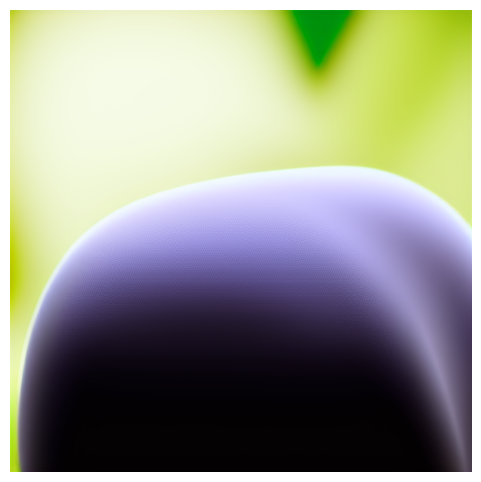

  0%|          | 0/50 [00:00<?, ?it/s]

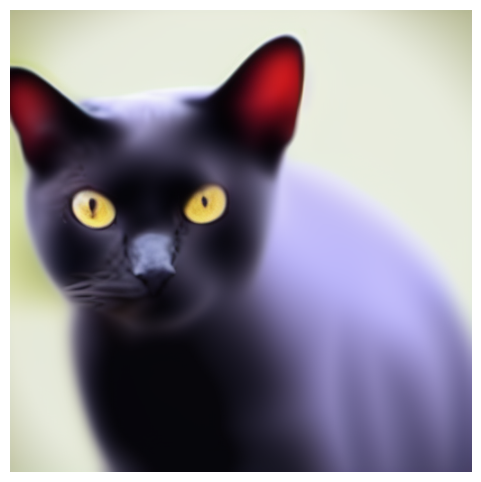

In [5]:
for m in range(2): # inner_round
    # Llama a la nueva función. Si no necesitas revertir la imagen, puedes ignorar la clave con '_'
    scrambled_image= latentes_explicitas(thriller,(32,16,16,16),(1,1,1,1)) # [4, 4, 64, 64]
    x_t_in = torch.cat([x_ts[-1], scrambled_image], dim=0)
    
    images = fruta.generate(x_t_in, x_ts, seecoder)
    
    #utils.save_images([images[1]*255], name=png_name[:-4] + f"_{m}.png", offset_ratio=0.0)

    # 1. Selecciona la imagen a plotear (la segunda imagen del batch, como en tu save_images)
    image_to_plot_np = images[1] # Esto ya es un NumPy array (esperamos) y los valores ya son 0-255

    if image_to_plot_np.ndim == 3 and image_to_plot_np.shape[0] in [1, 3, 4]: # C, H, W
        image_to_plot_np = image_to_plot_np.transpose(1, 2, 0) # H, W, C

    # 4. Plotea la imagen
    plt.figure(figsize=(6, 6)) # Ajusta el tamaño de la figura si es necesario
    plt.imshow(image_to_plot_np) # Asegúrate de que sea uint8 para visualización de imagen
    #plt.title(png_name[:-4] + f"_{m}.png") # Usa el mismo título que se usaría para guardar
    plt.axis('off') # Ocultar ejes
    plt.show()

### plots

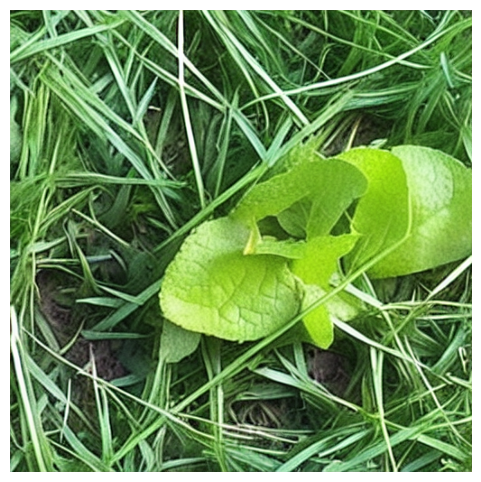

In [15]:
import matplotlib.pyplot as plt
# 1. Selecciona la imagen a plotear (la segunda imagen del batch, como en tu save_images)
image_to_plot_np = images[1] # Esto ya es un NumPy array (esperamos) y los valores ya son 0-255

if image_to_plot_np.ndim == 3 and image_to_plot_np.shape[0] in [1, 3, 4]: # C, H, W
    image_to_plot_np = image_to_plot_np.transpose(1, 2, 0) # H, W, C

# 4. Plotea la imagen
plt.figure(figsize=(6, 6)) # Ajusta el tamaño de la figura si es necesario
plt.imshow(image_to_plot_np) # Asegúrate de que sea uint8 para visualización de imagen
#plt.title(png_name[:-4] + f"_{m}.png") # Usa el mismo título que se usaría para guardar
plt.axis('off') # Ocultar ejes
plt.show()

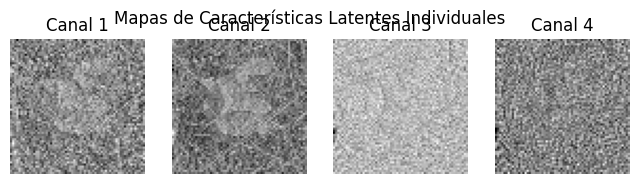

In [11]:
import matplotlib.pyplot as plt
# Asumo que 'my_tensor' es tu tensor latente
# my_tensor = x_ts[0] # Descomenta y usa tu tensor real

# Ejemplo de tensor para demostrar (elimina en tu código)
my_tensor = x_ts[0]

# 1. Quitar la dimensión del batch y mover a CPU/NumPy
latent_features = my_tensor.squeeze(0).cpu().numpy() # Shape: (4, 64, 64)

# 2. Normalizar los valores para visualización (importante para latentes)
# Esto escala los valores a un rango de 0 a 1 para mejor contraste
min_val = latent_features.min()
max_val = latent_features.max()
if max_val - min_val > 0: # Evitar división por cero si todos los valores son iguales
    normalized_features = (latent_features - min_val) / (max_val - min_val)
else:
    normalized_features = latent_features # Si todos los valores son iguales, no se normaliza

# ---

### Opciones de Visualización

#### Opción A: Visualizar Cada Canal Individualmente

fig, axes = plt.subplots(1, 4, figsize=(8, 2))
for i in range(4):
    axes[i].imshow(normalized_features[i], cmap='gray') # Mostrar cada canal en escala de grises
    axes[i].set_title(f'Canal {i+1}')
    axes[i].axis('off')
plt.suptitle("Mapas de Características Latentes Individuales")
plt.show()

In [1]:
import torch

tensor1 = torch.arange(1, 37, dtype=torch.float32).view(1, 1, 6, 6).expand(1, 4, 6, 6)
tensor2 = torch.zeros(36,dtype=torch.float32).view(1, 1, 6, 6).expand(1, 4, 6, 6)
tensor3 = torch.ones(36,dtype=torch.float32).view(1, 1, 6, 6).expand(1, 4, 6, 6)
tensor4 = torch.arange(-37,-1, dtype=torch.float32).view(1, 1, 6, 6).expand(1, 4, 6, 6)

print(tensor1[0,0])
print(tensor2[0,0])
print(tensor3[0,0])
print(tensor4[0,0])


tensor([[ 1.,  2.,  3.,  4.,  5.,  6.],
        [ 7.,  8.,  9., 10., 11., 12.],
        [13., 14., 15., 16., 17., 18.],
        [19., 20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36.]])
tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[-37., -36., -35., -34., -33., -32.],
        [-31., -30., -29., -28., -27., -26.],
        [-25., -24., -23., -22., -21., -20.],
        [-19., -18., -17., -16., -15., -14.],
        [-13., -12., -11., -10.,  -9.,  -8.],
        [ -7.,  -6.,  -5.,  -4.,  -3.,  -2.]])


In [2]:
tensor5 = torch.concat((tensor1, tensor2,tensor3,tensor4), dim=0)
tensor6 = torch.concat((tensor1, tensor2), dim=0)
tensor7 = torch.concat((tensor1, tensor2,tensor3), dim=0)
tensor8 = torch.concat((tensor1, tensor2,tensor3,tensor4,tensor4), dim=0)
tensor9= torch.concat((tensor1, tensor2,tensor3,tensor4,tensor1,tensor1), dim=0)

tensor5.size()

torch.Size([4, 4, 6, 6])

In [1]:
from utils.multi_guide import latentes_explicitas
import torch

tensor1 = torch.arange(1, 65, dtype=torch.float32).view(1, 1, 8, 8).expand(1, 4, 8, 8)
tensor2 = torch.zeros(64,dtype=torch.float32).view(1, 1, 8, 8).expand(1, 4, 8, 8)
tensor3 = torch.ones(64,dtype=torch.float32).view(1, 1, 8, 8).expand(1, 4, 8, 8)
tensor4 = torch.arange(-65,-1, dtype=torch.float32).view(1, 1, 8, 8).expand(1, 4, 8, 8)
tensor5 = torch.concat((tensor1, tensor2,tensor3,tensor4), dim=0)
tensor6 = torch.concat((tensor1, tensor2), dim=0)
tensor7 = torch.concat((tensor1, tensor2,tensor3), dim=0)
tensor8 = torch.concat((tensor1, tensor2,tensor3,tensor4,tensor4), dim=0)
tensor9= torch.concat((tensor1, tensor2,tensor3,tensor4,tensor1,tensor1), dim=0)

In [4]:
from utils.multi_guide import colocar_tensor_random, recorte_aleatorio
chiquito = recorte_aleatorio(tensor2,4)
chiquito
resultado = colocar_tensor_random(tensor1, chiquito)
resultado[0,0]

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12., 13., 14., 15., 16.],
        [17., 18.,  0.,  0.,  0.,  0., 23., 24.],
        [25., 26.,  0.,  0.,  0.,  0., 31., 32.],
        [33., 34.,  0.,  0.,  0.,  0., 39., 40.],
        [41., 42.,  0.,  0.,  0.,  0., 47., 48.],
        [49., 50., 51., 52., 53., 54., 55., 56.],
        [57., 58., 59., 60., 61., 62., 63., 64.]])

In [3]:
scrambled_image= latentes_explicitas(tensor5,(4,2,1,1),(0,1,0,0))
scrambled_image[0,0]

tensor([[ 1.,  2.,  3.,  4., 37., 38., 39., 40.],
        [ 9., 10., 11., 12., 45., 46., 47., 48.],
        [17., 18., 19., 20., 53., 54., 55., 56.],
        [25., 26., 27., 28., 61., 62., 63., 64.],
        [ 5.,  6.,  7.,  8., 33., 34., 35., 36.],
        [13., 14., 15., 16., 41., 42., 43., 44.],
        [21., 22., 23., 24., 49., 50., 51., 52.],
        [29., 30., 31., 32., 57., 58., 59., 60.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[ 1.,  2.,  3.,  4., 37., 38., 39., 40.],
        [ 9., 10., 11., 12., 45., 46., 47., 48.],
        [17.,  0.,  0.,  0.,  0., 54., 55., 56.],
        [25.,  0.,  0.,  0.,  0., 62., 63., 64.],
        [ 5.,  0.,  0.,  0.,  0., 34., 35., 36.],
        [13.,  0.,  0.,  0.,  0., 42., 43., 44.],
        [21., 22., 23., 24., 49., 50., 51., 52.],
        [29., 30., 31., 32., 57., 58., 

tensor([[  1.,   2.,   3.,   4.,  37.,  38.,  39.,  40.],
        [-23., -24.,  11.,  12.,  45.,  46.,  47.,  48.],
        [-31., -32.,   0.,   0.,   0.,  54.,  55.,  56.],
        [ 25.,   0.,   0.,   0.,   0.,   1.,   1.,  64.],
        [  5.,   0.,   0.,   0.,   0.,   1.,   1.,  36.],
        [ 13.,   0.,   0.,   0.,   0.,  42.,  43.,  44.],
        [ 21.,  22.,  23.,  24.,  49.,  50.,  51.,  52.],
        [ 29.,  30.,  31.,  32.,  57.,  58.,  59.,  60.]])